### analysis roofline results of advisor

In [56]:
%matplotlib inline
import os, sys
import re
import numpy
import math
import pandas as pd

import matplotlib.pyplot as plt

In [50]:
#{id:'140328587898464',name:'[loop in Eigen::internal::general_matrix_vector_product<long, float, Eigen::internal::const_blas_data_mapper<float, long, (int)1>, (int)1, (bool)0, float, Eigen::internal::const_blas_data_mapper<float, long, (int)0>, (bool)0, (int)0>::run]',
# selfGbPerSec:69.1285,selfTime:0.03,totalTime:1.055,type:'4',x:-0.690995,y:1.14866},

def read_roofline(datafile):
    """
    read roofline result file
    return:
        [name, AI, GFlops]
    """
    f =open(datafile,'r')
    data = f.read()
    #.split('{id:')
    
    sdata = re.sub('{id:', '\n{id:', data)
    
    ret = []
    for rec in sdata.split('\n')[1:]:
        mo = re.search(",name:'([^']*)'.*,x:([^,]*),y:([^,}]*)", rec)
        if mo:
            name = mo.group(1)
            ai = math.pow(10, float(mo.group(2)))
            gflops = math.pow(10, float(mo.group(3)))
            #ret.append([mo.group(1),mo.group(2),mo.group(3)])
            ret.append([name, ai, gflops])
        
    return ret 

def select_data(data, filters):
    """
    get subset of data by name filtering
    
    """
    ret = []
    for f in filters:
        for rec in data:
            if rec[0].find(f) >= 0:
                ret.append([f, rec[1], rec[2]])
                
    return ret

In [63]:
data_3200 = read_roofline('data/roofline_b3200_c16.data')
data_32 = read_roofline('data/roofline_b32_c1.data')
data_32_c16 = read_roofline('data/roofline_b32_c16.data')


In [64]:
filters=["matrix_vector_product","scalar_product_op","scalar_sum_op","scalar_logistic_op","_tanh_"]

db32k = select_data(data_3200, filters)
db32 = select_data(data_32, filters)
data32_c16 = select_data(data_32_c16, filters)

In [52]:
db32k

[['matrix_vector_product', 0.4444439512937877, 27.935085182946292],
 ['matrix_vector_product', 0.484848437090877, 21.505522565666755],
 ['matrix_vector_product', 0.4444439512937877, 21.505027388410955],
 ['matrix_vector_product', 0.20370655301543306, 14.081859276764895],
 ['matrix_vector_product', 0.3333335288379565, 7.679996108995958],
 ['scalar_product_op', 0.08333357242790017, 9.035100755781755],
 ['scalar_product_op', 0.12499999625598048, 2.7173401140680395],
 ['scalar_product_op', 0.12499999625598048, 1.8091725928585223],
 ['scalar_product_op', 1.2503453980348857e-06, 1e-05],
 ['scalar_sum_op', 0.08333357242790017, 14.336066273453069],
 ['scalar_sum_op', 0.08333357242790017, 14.330785644241692],
 ['scalar_sum_op', 0.08333357242790017, 14.19024847058319],
 ['scalar_sum_op', 0.08333357242790017, 10.092296474377246],
 ['scalar_sum_op', 0.20000000199681048, 9.920007488540403],
 ['scalar_sum_op', 0.08333357242790017, 6.719995774937963],
 ['scalar_sum_op', 0.12499999625598048, 4.7052315

In [65]:
data32_c16

[['matrix_vector_product', 0.484848437090877, 4.306108812913846],
 ['matrix_vector_product', 0.4444439512937877, 15.447208197209916],
 ['scalar_product_op', 0.08333357242790017, 3.167816379220401],
 ['scalar_product_op', 8.7086332233912e-06, 5.000460488301987e-05],
 ['scalar_sum_op', 0.08333357242790017, 4.300609401618022],
 ['scalar_sum_op', 0.20000000199681048, 9.932738456162832],
 ['scalar_sum_op', 0.08333357242790017, 6.559790960139684],
 ['scalar_sum_op', 0.08333357242790017, 7.168033065160517],
 ['scalar_sum_op', 0.08333357242790017, 5.935195106469209],
 ['scalar_sum_op', 9.527303494695147e-08, 5.0005756294853743e-08],
 ['scalar_sum_op', 0.12499999625598048, 5.779203668803263],
 ['scalar_logistic_op', 0.9583293739468873, 37.09454086485759],
 ['_tanh_', 0.32857158290793026, 13.738205234600647],
 ['_tanh_', 0.2499999950079739, 32.25596208931465]]

In [55]:
db32

[['matrix_vector_product', 0.4444439512937877, 7.722768206711722],
 ['matrix_vector_product', 0.484848437090877, 12.916950640121762],
 ['scalar_product_op', 0.08333357242790017, 2.587182113052963],
 ['scalar_product_op', 8.7086332233912e-06, 2.5003453616964294e-05],
 ['scalar_sum_op', 0.08333357242790017, 3.5841237809414035],
 ['scalar_sum_op', 0.08333357242790017, 2.374039824684168],
 ['scalar_sum_op', 0.20000000199681048, 10.472973388344275],
 ['scalar_sum_op', 0.08333357242790017, 6.559639917109859],
 ['scalar_sum_op', 0.08333357242790017, 5.375773969169624],
 ['scalar_sum_op', 0.12499999625598048, 2.8893556345386346],
 ['scalar_sum_op', 0.01829279215932264, 0.03779984334660242],
 ['scalar_sum_op', 0.12499999625598048, 0.1344157005968505],
 ['scalar_logistic_op', 0.9583304772649878, 18.454827919161378],
 ['_tanh_', 0.32857158290793026, 41.21829280111726],
 ['_tanh_', 0.2499999950079739, 10.751770855180236]]

### draw fig

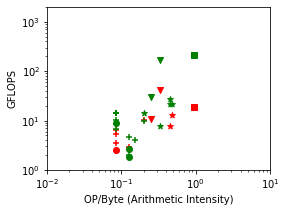

In [62]:
fig, axs = plt.subplots(1, 1, figsize=(4,3))

#colors = ['r','g','m']
#plabels = ['observed','svr','arima','ranknet']

ax = plt.subplot(1, 1, 1)
markers=["*",'o','+','s','v']
markers = {f:markers[idx] for idx,f in enumerate(filters)}

db=db32
color='r'
for pt in db:
    ax.scatter(pt[1],pt[2], marker=markers[pt[0]], color=color)    

    
db=db32k
color='g'
for pt in db:
    ax.scatter(pt[1],pt[2], marker=markers[pt[0]], color=color)    
    
    
ax.set_xlim((0.01, 10))
ax.set_ylim((1, 2000))
ax.set_xlabel('OP/Byte (Arithmetic Intensity)')
ax.set_ylabel('GFLOPS')

ax.set_yscale('log')
ax.set_xscale('log')

### test

In [27]:
rec="{id:'140328587898464',name:'[loop in Eigen::internal::general_matrix_vector_product<long, float, Eigen::internal::const_blas_data_mapper<float, long, (int)1>, (int)1, (bool)0, float, Eigen::internal::const_blas_data_mapper<float, long, (int)0>, (bool)0, (int)0>::run]',selfGbPerSec:69.1285,selfTime:0.03,totalTime:1.055,type:'4',x:-0.690995,y:1.14866}"

In [30]:
mo = re.match(".*name:'([^']*)'.*,x:([^,]*),y:([^,]*).*", rec)

In [31]:
mo

<_sre.SRE_Match object; span=(0, 351), match="{id:'140328587898464',name:'[loop in Eigen::inter>

In [32]:
mo = re.search("name:'([^']*)'.*,x:([^,]*),y:([^,]*)", rec)

In [33]:
mo

<_sre.SRE_Match object; span=(22, 351), match="name:'[loop in Eigen::internal::general_matrix_ve>

In [34]:
mo.group(1)

'[loop in Eigen::internal::general_matrix_vector_product<long, float, Eigen::internal::const_blas_data_mapper<float, long, (int)1>, (int)1, (bool)0, float, Eigen::internal::const_blas_data_mapper<float, long, (int)0>, (bool)0, (int)0>::run]'